K0 - J2
G1 - A0
A0 - K0
A0 - J2
G1 - K0
G1 - J2
AT4 - AT3
AT2 - AT1
AT1 - AT4
AT1 - AT3
AT2 - AT4
AT2 - AT3
002448 7.053 7.053 ms
002448 7.067 7.067 ms
calibrateur diam psiVir 5.3717


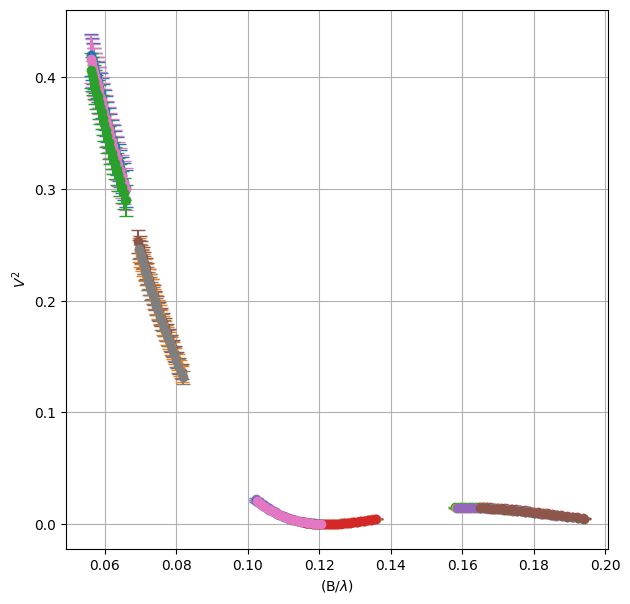

Diameter of uniform disk: 10.0359328125
UD_residual: 1572.8488170158043


<ipython-input-17-162b830441bf>:357: RuntimeWarning: invalid value encountered in divide
  new_model_UD = (2*jv(1,math.pi*x_axis_values*diam_UD)/(math.pi*x_axis_values*diam_UD))**2


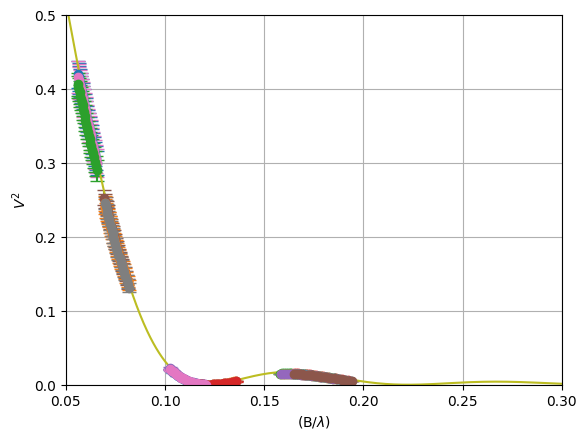

18 <class 'numpy.ndarray'>
18 <class 'numpy.ndarray'>


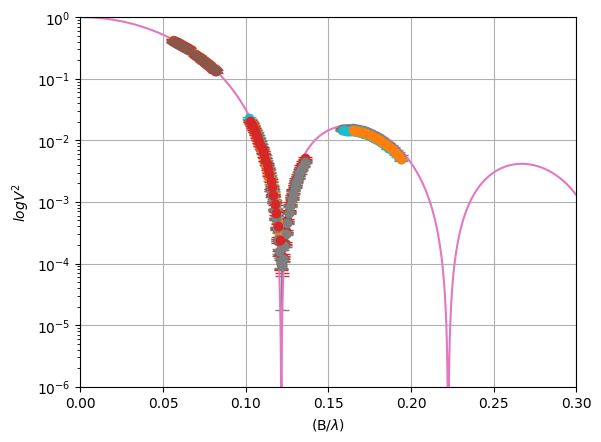

----------------------------------------------------------------------------------------
Angular diameter of limb darkening: 10.294410605627172
u_coefficient_LD: 0.24007030694505016
LD_residual: 577.0935356713915
Correlation correction using approximation eq: 1.017864393982079


<ipython-input-17-162b830441bf>:429: RuntimeWarning: invalid value encountered in divide
  new_model_LD = ((6/(3-u_coeff_LD))*(((1-u_coeff_LD)*jv(1,math.pi*x_axis_values*diam_LD)/(math.pi*x_axis_values*diam_LD))+(u_coeff_LD*np.sqrt(math.pi/2)*jv(1.5,math.pi*x_axis_values*diam_LD)/(math.pi*x_axis_values*diam_LD)**1.5)))**2


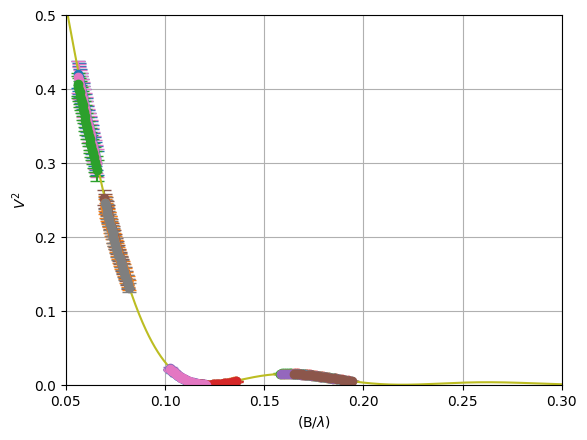

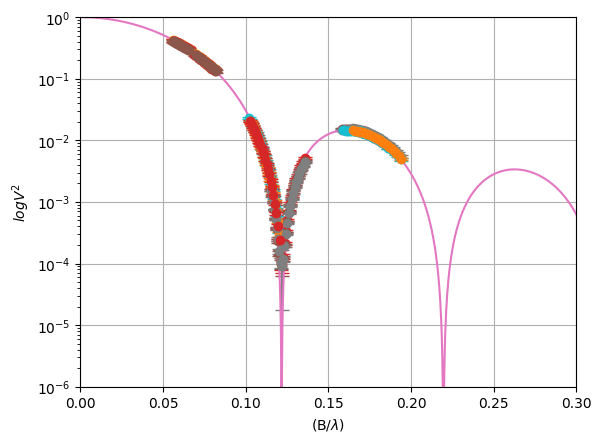

-----------------------------------------------------------------------
Angular diameter of limb darkening: 10.355002824026721
alpha_coefficient by power fit: 0.19092487264857344
PL_residual: 571.3719350643738


<ipython-input-17-162b830441bf>:493: RuntimeWarning: invalid value encountered in divide
  new_model_PL = (((alpha_coeff/2)+1)*(math.gamma((alpha_coeff/2)+1))*(2**((alpha_coeff/2)+1))*(jv(((alpha_coeff/2)+1),math.pi*x_axis_values*diam_PL)/(math.pi*x_axis_values*diam_PL)**((alpha_coeff/2)+1)))**2


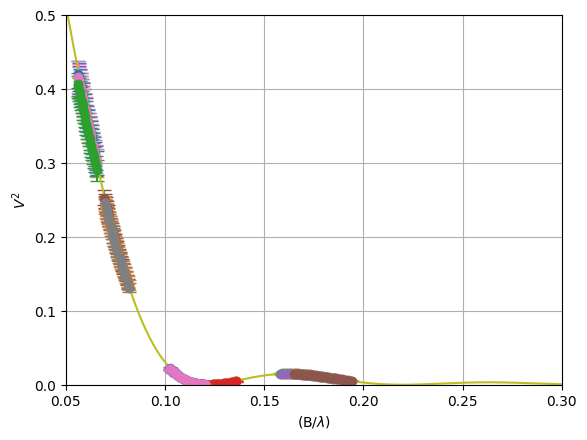

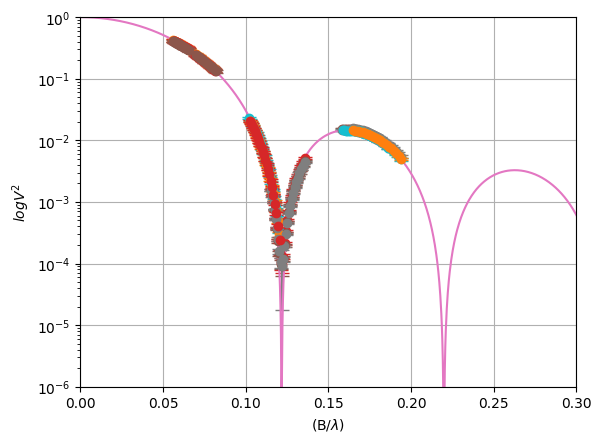

'\nminimize_methods = [\'COBYLA\',\'BFGS\',\'L-BFGS-B\']\ndiam_LD_res = []\nU_coeff_res = []\nfor minimize_method in minimize_methods:\n  temp_res = minimize(objfunc3 ,x0,method=minimize_method,args=(freq_mas[:,:],cal_V2,cal_V2_error))\n  diam_LD_res.append(temp_res.x[0])\n  U_coeff_res.append(temp_res.x[1])\n\n\nprint("methods : ", minimize_methods)\n# Diam_LD Bootstrap Data\nmean, std_dev, conf_interval = bootstrap_uncertainty(diam_LD_res)\nprint("diam_LD_bootstrap data")\nprint("data: ", diam_LD_res)\nprint("Mean:", mean)\nprint("Standard Deviation:", std_dev)\nprint("95% Confidence Interval:", conf_interval)\n\nprint()\n# U_Coefficient Bootstrap Data\nmean, std_dev, conf_interval = bootstrap_uncertainty(U_coeff_res)\nprint("U_coefficient_LD_bootstrap data")\nprint("data: ", U_coeff_res)\nprint("Mean:", mean)\nprint("Standard Deviation:", std_dev)\nprint("95% Confidence Interval:", conf_interval)\n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob,os
import random
import datetime
from astropy.io import fits
from scipy.special import jv
from scipy.optimize import minimize
from scipy.optimize import leastsq
from scipy.stats import norm
from random import choice
from array import *
from math import log
from scipy.special import gamma
import math
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
#Routine extracting the baseline and telescope names corresponding to the V2 measurements
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------


def extract_baselines(oifits_file):
    """
    #INPUT:
#oifits_file: input oifits file

#OUTPUT:
#2D arrays giving the corresponding name of the baselines and triplets, for the 6 V2 (or Phi) measurements and the 4 closure phases measurements, respectively.

    """
    hdulist = fits.open(oifits_file)
    sta_name=hdulist['OI_ARRAY'].data['STA_NAME']
    sta_index=hdulist['OI_ARRAY'].data['STA_INDEX']
    tel_name=hdulist['OI_ARRAY'].data['TEL_NAME']
    sta_name=np.array(sta_name)
    sta_index=np.array(sta_index)
    sta_index_V2 = hdulist['TF2'].data['STA_INDEX'][0:6]
    sta_index_V2=np.array(sta_index_V2)
    sta_name_V2=[]
    tel_name_V2=[]

    for i in range(6):
        ind0=np.where(sta_index_V2[i,0]==sta_index)
        ind1=np.where(sta_index_V2[i,1]==sta_index)
        ind0=np.array(ind0)
        ind1=np.array(ind1)
        ind0=ind0.item(0)
        ind1=ind1.item(0)
        sta_name_V2.append(str(sta_name[ind0]))
        sta_name_V2.append(str(sta_name[ind1]))
        tel_name_V2.append(str(tel_name[ind0]))
        tel_name_V2.append(str(tel_name[ind1]))
    sta_name_V2=np.reshape(sta_name_V2,(6,2))
    tel_name_V2=np.reshape(tel_name_V2,(6,2))

    return (sta_name_V2,tel_name_V2)

def bootstrap_uncertainty(data, n_samples=1000):
  """
  Calculates uncertainty using bootstrap with Gaussian distribution.

  Args:
      data: A NumPy array of data points (e.g., stellar oscillation frequencies).
      n_samples: The number of bootstrap samples (default 1000).

  Returns:
      A tuple containing the mean, standard deviation, and
      95% confidence interval of the data.
  """

  # Sample size
  sample_size = len(data)

  # List to store bootstrap means
  bootstrap_means = []

  # Perform bootstrap simulation
  for _ in range(n_samples):
    # Sample with replacement from the original data
    bootstrap_sample = np.random.choice(data, size=sample_size, replace=True)

    # Assume Gaussian distribution and estimate parameters (mean, std) from sample
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_std = np.std(bootstrap_sample)

    # Generate random values from the estimated Gaussian distribution
    gaussian_noise = np.random.normal(loc=bootstrap_mean, scale=bootstrap_std, size=sample_size)

    # Add Gaussian noise to the bootstrap sample (assuming noise in data)
    data_with_noise = bootstrap_sample + gaussian_noise

    # Calculate the mean of the data with noise
    bootstrap_mean = np.mean(data_with_noise)
    bootstrap_means.append(bootstrap_mean)

  # Calculate statistics
  mean = np.mean(bootstrap_means)
  std_dev = np.std(bootstrap_means)
  conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])

  return mean, std_dev, conf_interval

##################################    ROUTINES    ################################################################################################

#def EXAMPLE(a,b,c,....):    #a,b,c are input parameters
#    result=....
#    return result           #result returned by the routine EXAMPLE

#the main program calls the routine objfunc2.
#x0[0] is the angular diameter value provided by the minimization procedure
#frq,viss,errviss are the fixed parameters
#the minimization procedure stops when the sum (res) of the residuals is minimum


#UD model
def objfunc2(x0,frq,viss,errviss):
  res = 0
  a = x0[0]
  model = (2*jv(1,math.pi*frq*a)/(math.pi*frq*a))**2  # PARENTHESES
  residual = np.abs((viss - model)/((errviss)))
  res = np.sum(residual)
  #print(res)
  return res
  #print("Residuals:")


#LD model
def objfunc3(x0,frq,viss,errviss):
  res = 0
  a = x0[0]
  u = x0[1]
  model = ((6/(3-u))*(((1-u)*jv(1,math.pi*frq*a)/(math.pi*frq*a))+(u*np.sqrt(math.pi/2)*jv(1.5,math.pi*frq*a)/(math.pi*frq*a)**1.5)))**2  # PARENTHESES
  residual = np.abs((viss - model)/((errviss)))
  res = np.sum(residual)
  #print(res)
  return res
  #print("Residuals:")


#Power Law model
def objfunc4(x0,frq,viss,errviss):
  res = 0
  a = x0[0]  #diameter
  alpha = x0[1]  #power law coefficient
  model = (((alpha/2)+1)*(math.gamma((alpha/2)+1))*(2**((alpha/2)+1))*(jv(((alpha/2)+1),math.pi*frq*a)/(math.pi*frq*a)**((alpha/2)+1)))**2  # PARENTHESES
  residual = np.abs((viss - model)/((errviss)))
  res = np.sum(residual)
  #print(res)
  return res
  #print("Residuals:")
...
#	res=0.
#	residual=np.zeros((nrow,nwave))   #definition of the residual array
#	a=x0[0]                           #first input of the model
#	model=                            #calculate the model
#	residual=                         #calculate the residuals
#	res=                              #calculate the sum of the residuals
#	return res


##################################    MAIN PROGRAM    ################################################################################################

#............................
# Reading the data files
#...........................

DATE='2018-05-20' #date of observation
BASES='A0G1J2K0'  #baseline configuration
RESOL='LOW'       #low resolution in L-band (R=30)
nstar=2           #number of stars : the science star and the calibrator

#####################
#science star Delta Vir
#####################

tplstart='010737'#time at the beginning of the observation of the science star
STAR='delVir'
FILE0="new_"+DATE+"T"+tplstart+"_"+STAR+"_"+BASES+"_IR-LM_"+RESOL
#file=glob.glob(FILE0+"_IN_IN_Chop.fits")
file = glob.glob('/content/in_in_delvir.fits')
hdu=fits.open(file[0])
temp=hdu[0].copy()
vis2_1=hdu['OI_VIS2'].data['VIS2DATA']      #extract V
errvis2_1=hdu['OI_VIS2'].data['VIS2ERR']    #extract the error on V
ucoord=hdu['OI_VIS2'].data['UCOORD']	  #extract the u-coordinates of the telescopes for the science star observation (m)
vcoord=hdu['OI_VIS2'].data['VCOORD']	  #extract the v-coordinates of the telescopes for the science star observation (m)
diams=temp.header["HIERARCH ESO PRO JSDC DIAMETER"] #extract the angular diameter from the JSDC catalog
lamb=hdu['OI_WAVELENGTH'].data['EFF_WAVE']*1e6    #extract the wavelength values
tau0_science_start=temp.header['HIERARCH ESO ISS AMBI TAU0 START']  #coherence time at the beginning of the observation
tau0_science_end=temp.header['HIERARCH ESO ISS AMBI TAU0 END'] #coherence time at the end of the observation
hdu.close()
nrow=np.shape(ucoord)[0]                  #size of the coordinates array



#extract the name of the physical baselines and of the telescopes with the routine extract_baselines
sta_name_V,tel_name_V=extract_baselines(file[0])
for i in range(6):
	print(sta_name_V[i,0],'-',sta_name_V[i,1])            # print the telescope positions
for i in range(6):
	print(tel_name_V[i,0],'-',tel_name_V[i,1])            # print the telescope baselines

ix=np.where(np.abs(lamb-3.5)< 0.3)                #select a spectral domain ( m)
nwave=np.shape(ix)[1] 							  #size of the wavelength array

#Calculation of the spatial frequencies B/lambda for the science star observation
freq=np.zeros((nrow,nwave))
freq_mas=np.zeros((nrow,nwave))
for i in range(nrow):
  freq[i,:]=np.sqrt(ucoord[i]**2+vcoord[i]**2)/lamb[ix[0][:]]    #B/lambda spatial freqeuncies (radians)
freq_mas[:,:]=freq[:,:]*4.85/1000 #en 1/mas   # convert B/lambda in mas^-1

#create an array for V . The array vis2[0,:,:] contains V  for the science star,
#and vis2[1,:,:] will contain V  for the calibrator. Idem for errivis2
vis2=np.zeros((nstar,nrow,nwave))
errvis2=np.zeros((nstar,nrow,nwave))
vis2[0,:,:]=vis2_1[:,ix[0][:]]
errvis2[0,:,:]=errvis2_1[:,ix[0][:]]

###
# vis2[1,:,:] = vis2_1[:,ix[0][:]]
# errvis2[1,:,:]=errvis2_1[:,ix[0][:]]
#####################
#calibrator star psi vir
#####################
tplstart='002448'
STAR1='psiVir'

diamcal2=5.3717  #calibrated angular diameter of psi Vir

FILE0=DATE+"T"+tplstart+"_"+STAR1+"_"+BASES+"_IR-LM_"+RESOL
#=glob.glob(FILE0+"_IN_IN_Chop.fits")
file = glob.glob('/content/in_in_chop_psi_vir.fits')
hdu=fits.open(file[0])
temp=hdu[0].copy()

vis2_Cal=hdu['OI_VIS2'].data['VIS2DATA']
errvis2_Cal=hdu['OI_VIS2'].data['VIS2ERR']

u=hdu['OI_VIS2'].data['UCOORD']	  #extract the u-coordinates of the telescopes for the calibrator observation (m)
v=hdu['OI_VIS2'].data['VCOORD']	  #extract the v-coordinates of the telescopes for the calibrator observation (m)

tau0_calib_start=temp.header['HIERARCH ESO ISS AMBI TAU0 START']  #coherence time at the beginning of the observation
tau0_calib_end=temp.header['HIERARCH ESO ISS AMBI TAU0 END'] #coherence time at the end of the observation
hdu.close()

#Arrays of spatial frequencies B/lambda for the calibrator observation
freqcal=np.zeros((nrow,nwave))
freqcal_mas=np.zeros((nrow,nwave))
for i in range(nrow):
    freqcal[i,:]=np.sqrt(u[i]**2+v[i]**2)/lamb[ix[0][:]]    #in radians
freqcal_mas[:,:]=freqcal[:,:]*4.85/1000 #en 1/mas   #in mas^-1
# psi star
vis2[1,:,:]=vis2_Cal[:,ix[0][:]]
errvis2[1,:,:]=errvis2_Cal[:,ix[0][:]]

# print(tplstarts,tau0_science_start*1000,tau0_science_end*1000,'ms')
# print(tplstart,tau0_calib_start*1000,tau0_calib_end*1000,'ms')
print(tplstart,tau0_science_start*1000,tau0_science_end*1000,'ms')
print(tplstart,tau0_calib_start*1000,tau0_calib_end*1000,'ms')
print ('calibrateur diam', STAR1, diamcal2)

#..................................................
# calculation of calibrated V  of the science star
#..................................................

#Calculate the transfer function from the ratio of the rough V  of the calibrator with the UD model
#In this UD model the spatial frequencies and the angular diameters are those of the calibrator star

#Calculate the error (propagating error, use the simple variance formula) on the transfer function

#Calculate the calibrated V  of the science star and its error

pi_b_freq_cal = math.pi*freqcal_mas*diamcal2
zinc_func = jv(1,pi_b_freq_cal)/pi_b_freq_cal
y = ((2*zinc_func))
y2 = y**2
transfer_function = vis2[1,:,:]/(y2)

#transfer_func_error = [np.var(i) for i in transfer_function]
transfer_func_error =errvis2[1,:,:]/y2

cal_V2 = vis2[0,:,:]/transfer_function

#cal_V = np.sqrt(cal_V2)

## calculated error for cal v
#cal_V_error = [np.std(i) for i in cal_V]   # USE PROPAGATING ERRORS
cal_V2_error=np.sqrt((vis2[0,:,:]*transfer_func_error/transfer_function**2)**2+(errvis2[0,:,:]/transfer_function)**2)

#print("transfer_function: ",transfer_function)
#print("transfer_function error : ",transfer_func_error)
# print(transfer_function)
#.........................................
# plot of the calibrated V  with error bars
#........................................
plt.figure(figsize=(7, 7))
#for i in range(len(freqcal_mas)):
  # plt.plot((freqcal_mas[i]),(cal_V[i]))
for i in range(nrow):
 plt.errorbar(freq_mas[i,:], cal_V2[i,:], yerr=cal_V2_error[i,:], fmt='o', capsize = 5)   #PLOT OF V² WITH THE APPROPRIATE FREQUENCIES
#plt.title("Calibrated V_2")
plt.xlabel("(B/$\lambda$)")
plt.ylabel("$V^2$")
# plt.scatter(freqcal_mas_error, cal_V_error)
plt.grid()
plt.show()

#exit()  #END OF FIRST STEP



#...........................................
# minimization using the model of the uniform disk
#..........................................



# Use the minimization procedure to try to find a more adequat angular diameter corresponding to a better fit with a UD model
diam0=1.     #input of the minimization procedure : arbitrary initial value of the angular diameter (mas)
x0=[diam0]   #the array containing the first guess of the diameter, used to run the minimization procedure

# res= minimize(objfunc2,x0,method='COBYLA',args=(freq_mas[:,:],vis2_moy[:,:],errvis2_moy[:,:]))

res= minimize(objfunc2,x0,method='COBYLA',args=(freq_mas[:,:],cal_V2,cal_V2_error))
diam_UD=res.x[0] #resulting angular diameter
print("Diameter of uniform disk:", diam_UD)
model_UD = (2*jv(1,math.pi*freq_mas*diam_UD)/(math.pi*freq_mas*diam_UD))**2

residual_UD = np.abs((cal_V2 - model_UD)/((cal_V2_error)))
res_UD = np.sum(residual_UD)
print("UD_residual:", res_UD)
#plot V  and fit with the model - record the residual value
# second plot in semi log
#plt.figure(figsize=(7, 7))
#for i in range(len(freqcal_mas)):
  # plt.plot((freqcal_mas[i]),(cal_V[i]))

x_axis_values = np.linspace(0,0.3,1000)
new_model_UD = (2*jv(1,math.pi*x_axis_values*diam_UD)/(math.pi*x_axis_values*diam_UD))**2


for i in range(nrow):
 plt.errorbar(freq_mas[i,:], cal_V2[i,:], yerr=cal_V2_error[i,:], fmt='o', capsize = 5)   #PLOT OF V² WITH THE APPROPRIATE FREQUENCIES
#  plt.plot(freq_mas[i,:], model_UD[i,:])

plt.plot(x_axis_values,new_model_UD)
plt.xlim(0.05,0.3)
plt.ylim(0,0.5)
#plt.title("Calibrated V_2 _UD fitting")

plt.xlabel("(B/$\lambda$)")
plt.ylabel("$V^2$")
# plt.scatter(freqcal_mas_error, cal_V_error)
plt.grid()
plt.show()



### with log10
new_model_UD_log = (new_model_UD)
cal_V2_log10 = (cal_V2)
cal_V2_error_log10 = (cal_V2_error)
print(len(cal_V2_log10), type(cal_V2_log10))
print(len(cal_V2_error_log10),type(cal_V2_error_log10))

for i in range(nrow):
 plt.plot(freq_mas[i,:], cal_V2_log10[i,:])   #PLOT OF V² WITH THE APPROPRIATE FREQUENCIES
 #  plt.plot(freq_mas[i,:], model_UD[i,:])
 plt.errorbar(freq_mas[i,:], cal_V2[i,:], yerr=cal_V2_error[i,:], fmt='o', capsize = 5)
plt.plot(x_axis_values,(new_model_UD_log))
plt.xlim(0.0,0.3)
plt.ylim(10**-6,10**0)
#plt.title("log10 Calibrated V_2 _UD fitting")
plt.yscale("log")
plt.xlabel("(B/$\lambda$)")
plt.ylabel("$logV^2$")
# plt.scatter(freqcal_mas_error, cal_V_error)
plt.grid()
plt.show()


print("----------------------------------------------------------------------------------------")

#exit() #END OF SECOND STEP
#...........................................
# minimization using the LD model
#..........................................
u0=0
diam0=1.     #input of the minimization procedure : arbitrary initial value of the angular diameter (mas)
x0=[diam0,u0]
res= minimize(objfunc3 ,x0,method='COBYLA',args=(freq_mas[:,:],cal_V2,cal_V2_error))
diam_LD=res.x[0] #resulting angular diameter
u_coeff_LD=res.x[1]#limb darkening parameter
print("Angular diameter of limb darkening:", diam_LD)
print("u_coefficient_LD:", u_coeff_LD)
model_LD = ((6/(3-u_coeff_LD))*(((1-u_coeff_LD)*jv(1,math.pi*freq_mas*diam_LD)/(math.pi*freq_mas*diam_LD))+(u_coeff_LD*np.sqrt(math.pi/2)*jv(1.5,math.pi*freq_mas*diam_LD)/(math.pi*freq_mas*diam_LD)**1.5)))**2
residual_LD = np.abs((cal_V2 - model_LD)/((cal_V2_error)))
res_LD = np.sum(residual_LD)
print("LD_residual:", res_LD)
# x0 is now a 2D arrays with first guess for the angular diameter and the LD parameter u
# run the minimization using a second routine in which the LD model is calculated
# compare the results (plots and residuals) with those of the UD model
#correlation_correction = diam_LD/diam_UD
ratio_app = np.sqrt((1-(u_coeff_LD/3))/(1-(7*u_coeff_LD/15)))#diam_LD/diam_UD
#ratio_app = np.sqrt((1-(0.3/3))/(1-(7*0.3/15)))#using the limb darkening coefficient u as 0.3 to see if the curve for UD and LD both coincide (visibilityV2)
print("Correlation correction using approximation eq:",ratio_app)


### plot
x_axis_values = np.linspace(0,0.3,1000)
new_model_LD = ((6/(3-u_coeff_LD))*(((1-u_coeff_LD)*jv(1,math.pi*x_axis_values*diam_LD)/(math.pi*x_axis_values*diam_LD))+(u_coeff_LD*np.sqrt(math.pi/2)*jv(1.5,math.pi*x_axis_values*diam_LD)/(math.pi*x_axis_values*diam_LD)**1.5)))**2


for i in range(nrow):
 plt.errorbar(freq_mas[i,:], cal_V2[i,:], yerr=cal_V2_error[i,:], fmt='o', capsize = 5)   #PLOT OF V² WITH THE APPROPRIATE FREQUENCIES
#  plt.plot(freq_mas[i,:], model_UD[i,:])

plt.plot(x_axis_values,new_model_LD)
plt.xlim(0.05,0.3)
plt.ylim(0,0.5)
#plt.title("Calibrated V_2 _LD fitting")

plt.xlabel("(B/$\lambda$)")
plt.ylabel("$V^2$")
# plt.scatter(freqcal_mas_error, cal_V_error)
plt.grid()
plt.show()


#### log plot

new_model_LD_log = (new_model_LD)



for i in range(nrow):
 plt.plot(freq_mas[i,:], cal_V2_log10[i,:])   #PLOT OF V² WITH THE APPROPRIATE FREQUENCIES
#  plt.plot(freq_mas[i,:], model_UD[i,:])
 plt.errorbar(freq_mas[i,:], cal_V2_log10[i,:], yerr=cal_V2_error[i,:], fmt='o', capsize = 5)
plt.plot(x_axis_values,(new_model_LD_log))
# plt.xlim(0.05,0.3)
# plt.ylim(0,0.5)
plt.xlim(0.0,0.3)
plt.ylim(10**-6,10**0)
#plt.title("log10 Calibrated V_2 _UD fitting")
plt.yscale("log")
plt.xlabel("(B/$\lambda$)")
plt.ylabel("$logV^2$")
# plt.scatter(freqcal_mas_error, cal_V_error)
plt.grid()
plt.show()

print("-----------------------------------------------------------------------")
# THE END


#...........................................
# minimization using the Power fit model
#..........................................
alpha0=0
diam0=1.     #input of the minimization procedure : arbitrary initial value of the angular diameter (mas)
x0=[diam0,alpha0]
res= minimize(objfunc4 ,x0,method='COBYLA',args=(freq_mas[:,:],cal_V2,cal_V2_error))
diam_PL=res.x[0] #resulting angular diameter
alpha_coeff=res.x[1]#limb darkening parameter
print("Angular diameter of limb darkening:", diam_PL)
print("alpha_coefficient by power fit:",alpha_coeff)
model_PL = (((alpha_coeff/2)+1)*(math.gamma((alpha_coeff/2)+1))*(2**((alpha_coeff/2)+1))*(jv(((alpha_coeff/2)+1),math.pi*freq_mas*diam_PL)/(math.pi*freq_mas*diam_PL)**((alpha_coeff/2)+1)))**2
residual_PL = np.abs((cal_V2 - model_PL)/((cal_V2_error)))
res_PL = np.sum(residual_PL)
print("PL_residual:", res_PL)

### plot
x_axis_values = np.linspace(0,0.3,1000)
new_model_PL = (((alpha_coeff/2)+1)*(math.gamma((alpha_coeff/2)+1))*(2**((alpha_coeff/2)+1))*(jv(((alpha_coeff/2)+1),math.pi*x_axis_values*diam_PL)/(math.pi*x_axis_values*diam_PL)**((alpha_coeff/2)+1)))**2


for i in range(nrow):
 plt.errorbar(freq_mas[i,:], cal_V2[i,:], yerr=cal_V2_error[i,:], fmt='o', capsize = 5)   #PLOT OF V² WITH THE APPROPRIATE FREQUENCIES
#  plt.plot(freq_mas[i,:], model_UD[i,:])

plt.plot(x_axis_values,new_model_PL)
plt.xlim(0.05,0.3)
plt.ylim(0,0.5)
#plt.title("Calibrated V_2 _PL fitting")

plt.xlabel("(B/$\lambda$)")
plt.ylabel("$V^2$")
# plt.scatter(freqcal_mas_error, cal_V_error)
plt.grid()
plt.show()


#### log plot

new_model_PL_log = (new_model_PL)



for i in range(nrow):
 plt.plot(freq_mas[i,:], cal_V2_log10[i,:])   #PLOT OF V² WITH THE APPROPRIATE FREQUENCIES
#  plt.plot(freq_mas[i,:], model_UD[i,:])
 plt.errorbar(freq_mas[i,:], cal_V2_log10[i,:], yerr=cal_V2_error[i,:], fmt='o', capsize = 5)
plt.plot(x_axis_values,(new_model_PL_log))
# plt.xlim(0.05,0.3)
# plt.ylim(0,0.5)
plt.xlim(0.0,0.3)
plt.ylim(10**-6,10**0)
#plt.title("log10 Calibrated V_2 _UD fitting")
plt.yscale("log")
plt.xlabel("(B/$\lambda$)")
plt.ylabel("$logV^2$")
# plt.scatter(freqcal_mas_error, cal_V_error)
plt.grid()
plt.show()

#################################################################################################################
# res1 = minimize(objfunc3 ,x0,method='COBYLA',args=(freq_mas[:,:],cal_V2,cal_V2_error))
# diam_LD_res1 = res1.x[0]
# U_coeff_res1 = res1.x[1]

# res2 = minimize(objfunc3 ,x0,method='BFGS',args=(freq_mas[:,:],cal_V2,cal_V2_error))
# diam_LD_res2 = res2.x[0]
# U_coeff_res2 = res2.x[1]

# res3 = minimize(objfunc3 ,x0,method='L-BFGS-B',args=(freq_mas[:,:],cal_V2,cal_V2_error))
# diam_LD_res3 = res3.x[0]
# U_coeff_res3 = res3.x[1]

# print(diam_LD_res3, diam_LD_res2, diam_LD_res1)
# diam_LD_list = [diam_LD_res3, diam_LD_res2, diam_LD_res1]
# U_coeff__LD_list = [U_coeff_res3, U_coeff_res2, U_coeff_res1]
'''
minimize_methods = ['COBYLA','BFGS','L-BFGS-B']
diam_LD_res = []
U_coeff_res = []
for minimize_method in minimize_methods:
  temp_res = minimize(objfunc3 ,x0,method=minimize_method,args=(freq_mas[:,:],cal_V2,cal_V2_error))
  diam_LD_res.append(temp_res.x[0])
  U_coeff_res.append(temp_res.x[1])


print("methods : ", minimize_methods)
# Diam_LD Bootstrap Data
mean, std_dev, conf_interval = bootstrap_uncertainty(diam_LD_res)
print("diam_LD_bootstrap data")
print("data: ", diam_LD_res)
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("95% Confidence Interval:", conf_interval)

print()
# U_Coefficient Bootstrap Data
mean, std_dev, conf_interval = bootstrap_uncertainty(U_coeff_res)
print("U_coefficient_LD_bootstrap data")
print("data: ", U_coeff_res)
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("95% Confidence Interval:", conf_interval)
'''


<ipython-input-3-f2984645f28e>:4: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10^-6,10^0)


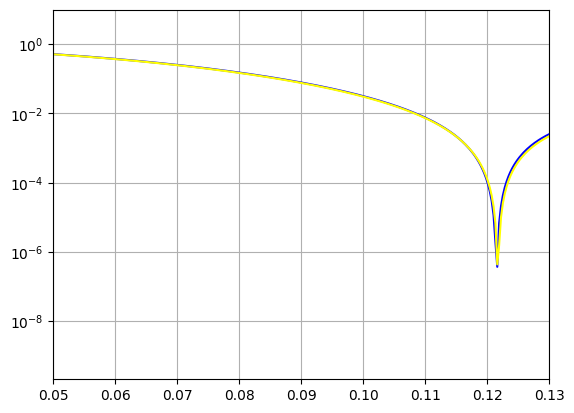

In [ ]:
plt.semilogy(x_axis_values,new_model_UD, color='blue')
plt.semilogy(x_axis_values,new_model_LD,color='yellow')
plt.xlim(0.05, 0.13)
plt.ylim(10^-6,10^0)
plt.grid()
plt.show()

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 571.3719350643738
       x: [ 1.036e+01  1.909e-01]
    nfev: 527
   maxcv: 0.0

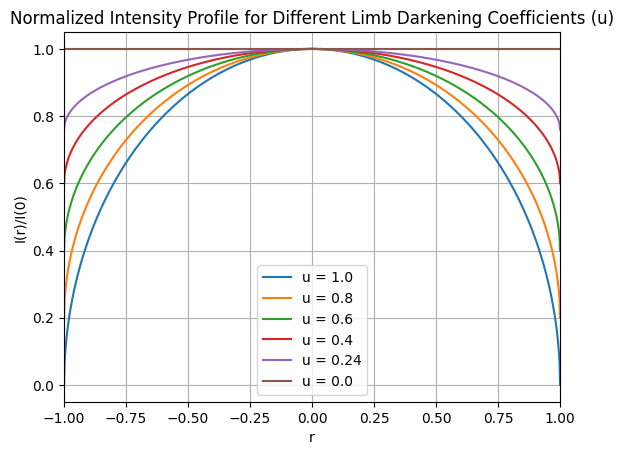

In [ ]:
# Define the range of radius values
r = np.linspace(-1, 1, 1000)

#define normalised intensity profile for limb darkening
def intensity(u,r):
  q = 1-u*(1-np.sqrt(1-r**2))
  return q

# Define limb darkening coefficients (u)
u_values = [1.0, 0.8, 0.6, 0.4, 0.24, 0.0]


# Plot each curve with its corresponding equation
for u in u_values:
  I = intensity(u,r)
  plt.plot(r, I,label=f"u = {u}")


# Set plot labels and title
plt.xlabel("r")
plt.ylabel("I(r)/I(0)")
plt.title("Normalized Intensity Profile for Different Limb Darkening Coefficients (u)")
plt.xlim(-1,1)
#plt.ylim(0,1)
# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
syn_model_list = []
for residuals in residual_list:
  syn_model = cal_V2 + cal_V2_error*residuals
  syn_model_list.append(syn_model)


In [ ]:
def objfunc_sync(x0,frq,viss,errviss,model):
  print(model)
  res = 0
  a = x0[0]
  u = x0[1]
  # model = ((6/(3-u))*(((1-u)*jv(1,math.pi*frq*a)/(math.pi*frq*a))+(u*np.sqrt(math.pi/2)*jv(1.5,math.pi*frq*a)/(math.pi*frq*a)**1.5)))**2  # PARENTHESES
  residual = np.abs((viss - model)/((errviss)))
  res = np.sum(residual)
  return res

diam_LD_syn_list = []
u_coeff_syn_list = []
(print(cal_V2_error))
# for idx,sync_model in enumerate(syn_model_list):
#   u0=0
#   diam0=1.     #input of the minimization procedure : arbitrary initial value of the angular diameter (mas)
#   x0=[diam0,u0]
  # res=  minimize(objfunc_sync ,x0,method='COBYLA',args=(freq_mas[:,:],cal_V2,cal_V2_error, sync_model))

  # print(f"output for {idx} sync model:\n\n")
  # diam_LD=res.x[0] #resulting angular diameter
  # u_coeff_LD=res.x[1]#limb darkening parameter
  # diam_LD_syn_list.append(diam_LD)
  # u_coeff_syn_list.append(u_coeff_LD)
  # print("Angular diameter of limb darkening:", diam_LD)
  # print("u_coefficient_LD:", u_coeff_LD)

[[1.87123741e-02 1.86150938e-02 1.84795065e-02 1.83506414e-02
  1.82125365e-02 1.82017767e-02 1.81023992e-02 1.80092692e-02
  1.79684849e-02 1.79450688e-02 1.78459847e-02 1.77975000e-02
  1.77514718e-02 1.76686402e-02 1.75614219e-02 1.74617392e-02
  1.73367739e-02 1.72170198e-02 1.70535984e-02 1.68603649e-02
  1.67262989e-02 1.65357535e-02 1.63751889e-02 1.62572799e-02
  1.61567603e-02]
 [5.78276223e-05 4.62575187e-05 3.52327626e-05 2.67640312e-05
  1.87142814e-05 1.47019517e-05 1.22363222e-05 1.38402023e-05
  2.27659540e-05 2.57060728e-05 1.23405676e-05 1.16296805e-05
  1.67230264e-05 2.47592035e-05 3.45559221e-05 4.01805488e-05
  4.96404286e-05 6.17580342e-05 7.18710452e-05 8.43264167e-05
  9.88927541e-05 1.21191180e-04 1.45993473e-04 1.76208432e-04
  2.07062040e-04]
 [6.23146248e-04 6.35557402e-04 6.44706018e-04 6.45352317e-04
  6.48115992e-04 6.48230929e-04 6.45625144e-04 6.37663356e-04
  6.38727087e-04 6.34944128e-04 6.32745648e-04 6.21520466e-04
  6.08622214e-04 5.95681343e-04 5.

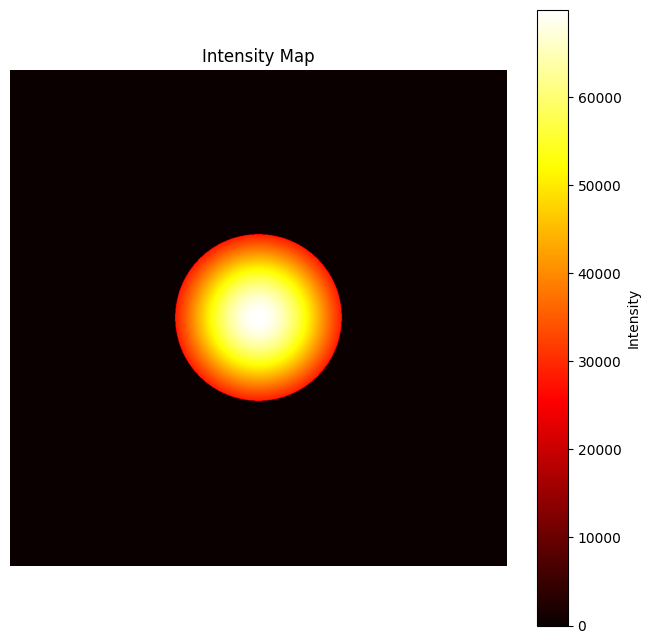

In [ ]:
#showing effect of limb darkening

x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)
Z = np.exp(-2 * (X**2 + Y**2))*70000 # Example intensity map
threshold = 0.58*np.max(Z)
Z_thres = np.where(Z >= 0.7*threshold, Z, 0)
# Plotting the intensity map
plt.figure(figsize=(8, 8))
plt.imshow(Z_thres, cmap='hot', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Intensity Map')
plt.axis('off')
plt.show()


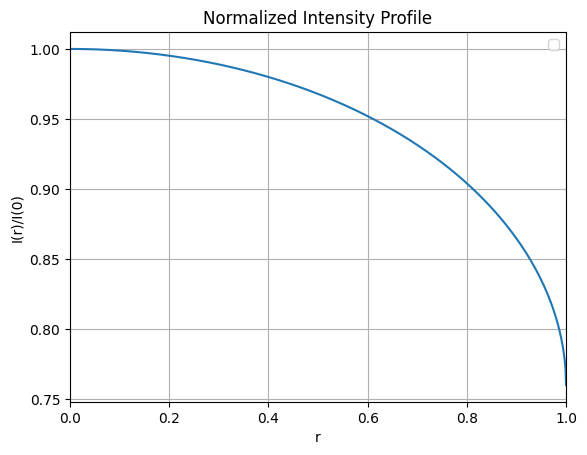

In [ ]:
# Define the range of radius values
r = np.linspace(0, 1, 1000)

#define normalised intensity profile for limb darkening
def intensity(u,r):
  q = 1-u*(1-(np.sqrt(1-r**2)))
  return q

# Plot each curve with its corresponding equation
I = intensity(0.24007030694505016,r)
plt.plot(r, I)


# Set plot labels and title
plt.xlabel("r")
plt.ylabel("I(r)/I(0)")
plt.title("Normalized Intensity Profile")
plt.xlim(0,1)
#plt.ylim(0,1)
# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()